## Rosenthal solution
A simpler solution, derived by Rosenthal, predicts the temperature field produced by a steady state point heat source moving on the surface of a semi-infinite plate:

\begin{align*}
\large
T - T_{o} = \frac{q}{2 \pi k R} \exp{ \bigg({-\frac{v ( w + R )}{2a}} \bigg)}
\end{align*}

$T$: Temperature  
$T_{0}$ : Initial temperature  
$q$ : Power  
$k$ : Material thermal conductivity  
$R$ : Distance to the center of the arc  
$v$ : Travel speed  
$w$ : Distance in travelling direction in a moving coordinate of speed $v$  
$a$ : Material thermal diffussivity  

### In dimensionless form: 

\begin{align*}
\large
\theta = n \frac{e^{-(\xi + R^{*})}}{R^{*}}
\end{align*}

\begin{align*}
\large
\theta = \frac{T-T_{o}}{T_{c}-T_{o}}, \
n = \frac{qv}{4 \pi a^2 \rho c (T_{c}-T_{o})}, \
\xi = \frac{vw}{2a}, R^{*} = (\xi^{2} + \psi^{2} + \zeta^{2})^{1/2}
\end{align*}

$R^{*}$: Dimensionless distance from the center of the arc

Rosenthal's model fails to provide weld pool shape information, as it predicts all transverse isotherms to have semicircular shapes. In addition, it fails to predict the temperature as $R \rightarrow 0$.  
For the model derivation, the following assumptions were made:  
1) Absence of convective and radiative heat flow in weld pool  
2) No latent heat of phase change  
3) Constant average thermal properties  
4) Quasi-steady state semi-infinite medium 

For the Rosenthal solution all the power is concentrated on a singular point and thus it is reasonable that the temperature close to that point is extremely high. The Rosenthal analytical solution returns an infinite value at the centerline point (0,0,0). This also has an effect on the shape of the isotherm contours, as they are of constant shape, semi-circular at the transverse YZ plane. 

In [16]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

def point(w,y,z,q,A,v,k,a,Tambient): 
    '''
    Rosenthal's solution for the temperature distribution produced by a 
    steady point heat source moving on the surface of a semi-infinite plate
    
    r : Distance from the moving heat source to point of interest (meters)
    w : Point coordinate wrt moving origin set on the source - along scan-axis (meters)
    y : Point coordinate along y-axis -width dimension (meters)
    z : Point coordinate along z-axis - depth dimension (meters)
    q : Power deposited on material (W)
    A : Absorptivity
    v : Scan speed (m/s)
    k : Thermal conductivity (W/mK)
    a : Thermal diffusivity (m^2/s)
    '''
    power = q * A
    r=numpy.sqrt((w**2)+(y**2)+(z**2))
    T= (power/(2*numpy.pi*k*r))*numpy.exp(-(v*(w+r)/(2*a)))
    T = T + Tambient
    return T

In [41]:
k_solid = 2.3 # Thermal conductivity in W/mK 
rho = 7642 # Density in kg/m^3
C = 128 # Specific heat in J/kgK
a_solid = k_solid/(rho*C) # Thermal diffusivity in m^2/s 
Tambient = 300 # Initial temperature (ambient) in Kelvin
Tmelt = 846 # Melting temperature for Bi2Te3 in Kelvin(from Alfa-Aesar material specs sheet-573 C)

speed = 0.5 # Scan speed in m/s
rb = 25e-6 # beam radius in meters
power = 550 # Power in Watts

Absor = 0.6 # Absorptivity
phi = 0.4 # Porosity of powder bed 

wYZ = rb/2
y = numpy.linspace (-30e-06,30e-06,500)
z = numpy.linspace (0,80e-06, 500)

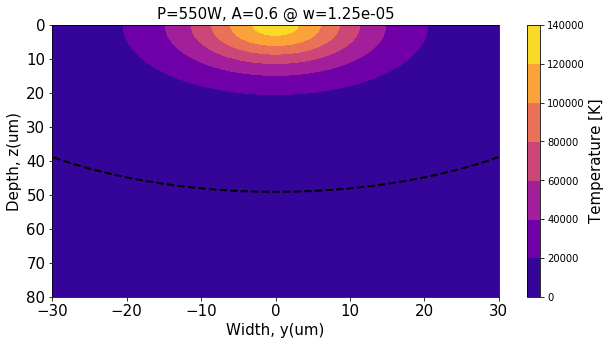

In [42]:
Rosental_contours = pyplot.figure (figsize = (10,5)) ;  font = 15 
xgridYZ, ygridYZ = numpy.meshgrid ( y, z )
TYZ = point ( wYZ, xgridYZ, ygridYZ, power, Absor, speed, k_solid, a_solid, Tambient )
xgridYZ = xgridYZ * (10**6) ; ygridYZ = ygridYZ * (10**6) ;
contYZ = pyplot.contourf ( xgridYZ, ygridYZ, TYZ, cmap = cm.plasma) 
contlines = pyplot.contour ( xgridYZ, ygridYZ, TYZ, [Tmelt],colors=('black'),linewidths=(2),linestyles= '--')
cbar = pyplot.colorbar ( contYZ )

pyplot.gca().invert_yaxis() ; pyplot.tick_params(labeltop=False, labelright=False,labelleft=True,labelbottom=True)
pyplot.ylabel('Depth, z(um)',fontsize=font) ;  pyplot.xlabel('Width, y(um)',fontsize=font) ;
title='P='+ str (power)  +  'W, A='+ str(Absor) + ' @ w='+ str(wYZ)
cbar.set_label('Temperature [K]',fontsize=font) ; pyplot.title(title,fontsize=font)
pyplot.yticks(fontsize=font, rotation=0) ; pyplot.xticks(fontsize=font, rotation=0);
#pyplot.axis('scaled', adjustable='box');
#pyplot.ticklabel_format(axis='both', style='sci', scilimits=(-2,0))